In [3]:
import  pandas as pd
import numpy as np
from pandas import Series,DataFrame

import  pandas as pd
import numpy as np
from pandas import Series,DataFrame
from pylab import mpl
mpl.rcParams['font.sans-serif'] = ['SimHei']  #中文显示问题

data_train = pd.read_csv('/kaggle/titanic/Kaggle_Titanic-master/train.csv')
data_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [255]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [4]:
data_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


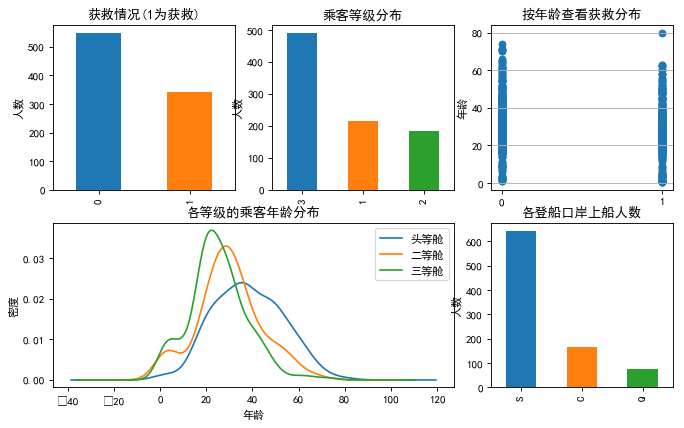

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,6),dpi=80)
fig.set(alpha = 0.2)

plt.subplot2grid((2,3),(0,0))
data_train.Survived.value_counts().plot(kind = 'bar')
plt.title("获救情况(1为获救)")
plt.ylabel("人数")

plt.subplot2grid((2,3),(0,1))
data_train.Pclass.value_counts().plot(kind = 'bar')
plt.ylabel("人数")
plt.title("乘客等级分布")

plt.subplot2grid((2,3),(0,2))
plt.scatter(data_train.Survived, data_train.Age)
plt.xticks((0,1))
plt.ylabel("年龄")
plt.grid(axis='y')
plt.title("按年龄查看获救分布")

plt.subplot2grid((2,3),(1,0), colspan=2)
data_train.Age[data_train.Pclass == 1].plot(kind='kde')
data_train.Age[data_train.Pclass == 2].plot(kind='kde')
data_train.Age[data_train.Pclass == 3].plot(kind='kde')
plt.xlabel("年龄")
plt.ylabel("密度")
plt.title("各等级的乘客年龄分布")
plt.legend(('头等舱','二等舱','三等舱'),loc='best')

plt.subplot2grid((2,3),(1,2))
data_train.Embarked.value_counts().plot(kind='bar')
plt.title("各登船口岸上船人数")
plt.ylabel("人数")
plt.show()

<Figure size 432x288 with 0 Axes>

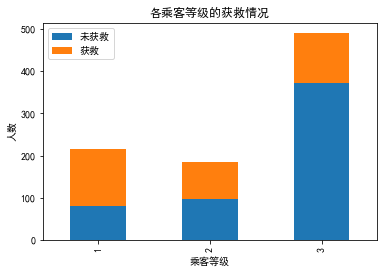

In [6]:
fig = plt.figure()
fig.set(alpha=0.2)

Survived_0 = data_train.Pclass[data_train.Survived == 0].value_counts()
Survived_1 = data_train.Pclass[data_train.Survived == 1].value_counts()
df = pd.DataFrame({'未获救':Survived_0,'获救':Survived_1})
df.plot(kind='bar',stacked=True)
plt.title(u"各乘客等级的获救情况")
plt.xlabel(u"乘客等级") 
plt.ylabel(u"人数")
plt.show()

<Figure size 432x288 with 0 Axes>

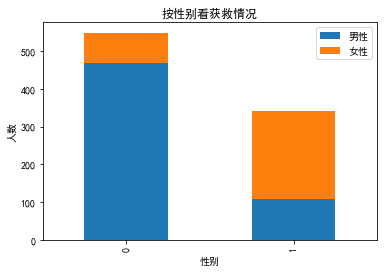

In [7]:
fig = plt.figure()
fig.set(alpha=0.2)

Survived_m = data_train.Survived[data_train.Sex == 'male'].value_counts()
Survived_f = data_train.Survived[data_train.Sex == 'female'].value_counts()
df = pd.DataFrame({'男性':Survived_m,'女性':Survived_f})
df.plot(kind='bar',stacked=True)
plt.title(u"按性别看获救情况")
plt.xlabel(u"性别") 
plt.ylabel(u"人数")
plt.show()

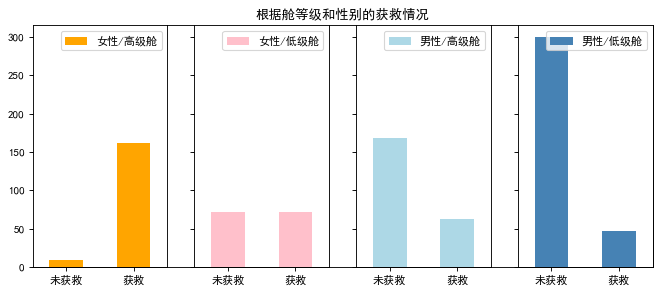

In [8]:
fig = plt.figure(figsize=(10,4),dpi=80)
fig.set(alpha=0.65)
plt.title(u"根据舱等级和性别的获救情况")

plt.xticks([])
plt.yticks([])

ax1 = fig.add_subplot(141)
data_train.Survived[data_train.Sex == "female"][data_train.Pclass != 3].value_counts().sort_index().plot(kind='bar', label='female highclass', color='orange')
ax1.set_xticklabels([u"未获救", u"获救"], rotation=0)
ax1.legend([u"女性/高级舱"], loc='best')

ax2=fig.add_subplot(142, sharey=ax1)
data_train.Survived[data_train.Sex == 'female'][data_train.Pclass == 3].value_counts().sort_index().plot(kind='bar', label='female, low class', color='pink')
ax2.set_xticklabels([u"未获救", u"获救"], rotation=0)
plt.legend([u"女性/低级舱"], loc='best')

ax3=fig.add_subplot(143, sharey=ax1)
data_train.Survived[data_train.Sex == 'male'][data_train.Pclass != 3].value_counts().sort_index().plot(kind='bar', label='male, high class',color='lightblue')
ax3.set_xticklabels([u"未获救", u"获救"], rotation=0)
plt.legend([u"男性/高级舱"], loc='best')

ax4=fig.add_subplot(144, sharey=ax1)
data_train.Survived[data_train.Sex == 'male'][data_train.Pclass == 3].value_counts().sort_index().plot(kind='bar', label='male low class', color='steelblue')
ax4.set_xticklabels([u"未获救", u"获救"], rotation=0)
plt.legend([u"男性/低级舱"], loc='best')


plt.show()

<Figure size 432x288 with 0 Axes>

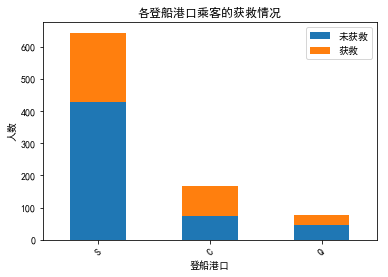

In [9]:
fig = plt.figure()
fig.set(alpha=0.2)

Survived_0 = data_train.Embarked[data_train.Survived == 0].value_counts()
Survived_1 = data_train.Embarked[data_train.Survived == 1].value_counts()
df=pd.DataFrame({u'未获救':Survived_0,u'获救':Survived_1})
df.plot(kind='bar', stacked=True)
plt.title(u"各登船港口乘客的获救情况")
plt.xlabel(u"登船港口") 
plt.ylabel(u"人数") 
plt.xticks(rotation = 45)
plt.show()

In [10]:
gg = data_train.groupby(['SibSp','Survived'])
df = pd.DataFrame(gg.count()['PassengerId'])
print(df)


gp = data_train.groupby(['Parch','Survived'])
df = pd.DataFrame(gp.count()['PassengerId'])
print(df)


                PassengerId
SibSp Survived             
0     0                 398
      1                 210
1     0                  97
      1                 112
2     0                  15
      1                  13
3     0                  12
      1                   4
4     0                  15
      1                   3
5     0                   5
8     0                   7
                PassengerId
Parch Survived             
0     0                 445
      1                 233
1     0                  53
      1                  65
2     0                  40
      1                  40
3     0                   2
      1                   3
4     0                   4
5     0                   4
      1                   1
6     0                   1


In [11]:
data_train.Cabin.value_counts()

C23 C25 C27        4
G6                 4
B96 B98            4
E101               3
C22 C26            3
D                  3
F33                3
F2                 3
C124               2
D26                2
E33                2
C125               2
C123               2
B20                2
F4                 2
B49                2
E121               2
E25                2
D35                2
C2                 2
C92                2
B51 B53 B55        2
C52                2
B35                2
B57 B59 B63 B66    2
E44                2
B28                2
C68                2
E24                2
E8                 2
                  ..
A31                1
E17                1
D19                1
C32                1
A20                1
C85                1
D21                1
E58                1
D9                 1
C49                1
A34                1
A36                1
E10                1
B37                1
B38                1
B82 B84            1
D11          

<Figure size 432x288 with 0 Axes>

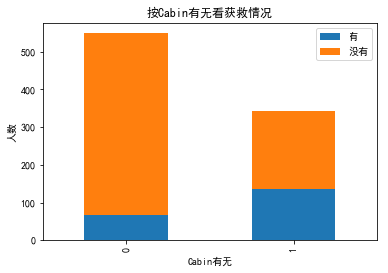

In [316]:
fig = plt.figure()
fig.set(alpha=0.2) 

Survived_cabin = data_train.Survived[pd.notnull(data_train.Cabin)].value_counts()
Survived_nocabin = data_train.Survived[pd.isnull(data_train.Cabin)].value_counts()
df = pd.DataFrame({'有':Survived_cabin,'没有':Survived_nocabin})
df.plot(kind='bar', stacked=True)
plt.title(u"按Cabin有无看获救情况")
plt.xlabel(u"Cabin有无") 
plt.ylabel(u"人数")
plt.show()

In [3]:
from sklearn.ensemble import RandomForestRegressor

### 使用 RandomForestClassifier 填补缺失的年龄属性
def set_missing_ages(df):

    # 把已有的数值型特征取出来丢进Random Forest Regressor中
    age_df = df[['Age','Fare', 'Parch', 'SibSp', 'Pclass']]

    # 乘客分成已知年龄和未知年龄两部分
    known_age = age_df[age_df.Age.notnull()].values
    unknown_age = age_df[age_df.Age.isnull()].values

    # y即目标年龄
    y = known_age[:, 0]

    # X即特征属性值
    X = known_age[:, 1:]

    # fit到RandomForestRegressor之中
    rfr = RandomForestRegressor(random_state=0, n_estimators=2000, n_jobs=-1)
    rfr.fit(X, y)

    # 用得到的模型进行未知年龄结果预测
    predictedAges = rfr.predict(unknown_age[:, 1::])

    # 用得到的预测结果填补原缺失数据
    df.loc[ (df.Age.isnull()), 'Age' ] = predictedAges 

    return df, rfr

def set_Cabin_type(df):
    df.loc[ (df.Cabin.notnull()), 'Cabin' ] = "Yes"
    df.loc[ (df.Cabin.isnull()), 'Cabin' ] = "No"
    return df

data_train, rfr = set_missing_ages(data_train)
data_train = set_Cabin_type(data_train)

In [464]:
data_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,No,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,Yes,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,No,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,Yes,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,No,S
5,6,0,3,"Moran, Mr. James",male,23.838953,0,0,330877,8.4583,No,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,Yes,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,No,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.1333,No,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,No,C


In [4]:
dumies_Cabin = pd.get_dummies(data_train['Cabin'], prefix='Cabin')

dummies_Embarked = pd.get_dummies(data_train['Embarked'], prefix= 'Embarked')

dummies_Sex = pd.get_dummies(data_train['Sex'], prefix= 'Sex')

dummies_Pclass = pd.get_dummies(data_train['Pclass'], prefix= 'Pclass')

df = pd.concat([data_train, dumies_Cabin, dummies_Embarked, dummies_Sex, dummies_Pclass], axis=1)
df.drop(['Pclass', 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], axis=1, inplace=True)
df

,PassengerId,Survived,Age,SibSp,Parch,Fare,Cabin_No,Cabin_Yes,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3
0,1,0,22.000000,1,0,7.2500,1,0,0,0,1,0,1,0,0,1
1,2,1,38.000000,1,0,71.2833,0,1,1,0,0,1,0,1,0,0
2,3,1,26.000000,0,0,7.9250,1,0,0,0,1,1,0,0,0,1
3,4,1,35.000000,1,0,53.1000,0,1,0,0,1,1,0,1,0,0
4,5,0,35.000000,0,0,8.0500,1,0,0,0,1,0,1,0,0,1
5,6,0,23.838953,0,0,8.4583,1,0,0,1,0,0,1,0,0,1
6,7,0,54.000000,0,0,51.8625,0,1,0,0,1,0,1,1,0,0
7,8,0,2.000000,3,1,21.0750,1,0,0,0,1,0,1,0,0,1
8,9,1,27.000000,0,2,11.1333,1,0,0,0,1,1,0,0,0,1
9,10,1,14.000000,1,0,30.0708,1,0,1,0,0,1,0,0,1,0


In [5]:
#年龄分割test
df_train["Age_cut"] = pd.cut(df_train["Age"],bins=[x for x in range(0,81,10)])
dummies_age_cut = pd.get_dummies(df_train['Age_cut'], prefix= 'Age_cut')

df = pd.concat([df, dummies_age_cut], axis=1)
df

NameError: name 'df_train' is not defined

In [467]:
import sklearn.preprocessing as preprocessing
scaler = preprocessing.StandardScaler()
age_scale_param = scaler.fit(df['Age'].values.reshape(-1,1))
df['Age_scaled'] =  scaler.fit_transform(df['Age'].values.reshape(-1,1), age_scale_param)
fare_scale_param = scaler.fit(df['Fare'].values.reshape(-1,1))
df['Fare_scaled'] = scaler.fit_transform(df['Fare'].values.reshape(-1,1), fare_scale_param)
df["child"] = 0
df.loc[df["Age"]<12] = 1

In [468]:
from sklearn import linear_model

#train_df = df.filter(regex='Survived|Age_.*|SibSp|Parch|Fare_.*|Cabin_.*|Embarked_.*|Sex_.*|Pclass_.*')
train_df = df.filter(regex='Survived|Age_cut.*|SibSp|Parch|Fare_.*|Cabin_.*|Embarked_.*|Sex_.*|Pclass_.*|child')
train_np = train_df.values

y = train_np[:,0]
X = train_np[:,1:]

clf = linear_model.LogisticRegression(C=1.0, penalty='l1', tol=1e-6, solver='liblinear')
clf.fit(X,y)

clf

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l1', random_state=None, solver='liblinear',
          tol=1e-06, verbose=0, warm_start=False)

In [469]:
data_test = pd.read_csv("/kaggle/titanic/Kaggle_Titanic-master/test.csv")
data_test.loc[(data_test.Fare.isnull()), 'Fare'] = 0

tmp_df = data_test[['Age','Fare', 'Parch', 'SibSp', 'Pclass']]
null_age = tmp_df[data_test.Age.isnull()].values

X = null_age[:,1:]
predictedAges = rfr.predict(X)
data_test.loc[(data_test.Age.isnull()),'Age'] = predictedAges

data_test = set_Cabin_type(data_test)
dummies_Cabin = pd.get_dummies(data_test['Cabin'], prefix= 'Cabin')
dummies_Embarked = pd.get_dummies(data_test['Embarked'], prefix= 'Embarked')
dummies_Sex = pd.get_dummies(data_test['Sex'], prefix= 'Sex')
dummies_Pclass = pd.get_dummies(data_test['Pclass'], prefix= 'Pclass')

df_test = pd.concat([data_test, dummies_Cabin, dummies_Embarked, dummies_Sex, dummies_Pclass], axis=1)
df_test.drop(['Pclass', 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], axis=1, inplace=True)

#年龄分割test
test_temp = pd.cut(df_test["Age"],bins=[x for x in range(0,81,10)])
dummies_age_cut = pd.get_dummies(test_temp, prefix= 'Age_cut')

df_test = pd.concat([df_test, dummies_age_cut], axis=1)

#用训练集代替总体样本
df_test['Age_scaled'] = scaler.fit_transform(df_test['Age'].values.reshape(-1,1), age_scale_param)
df_test['Fare_scaled'] = scaler.fit_transform(df_test['Fare'].values.reshape(-1,1), fare_scale_param)
df_test["child"] = 0
df_test.loc[df["Age"]<12] = 1

In [470]:
test = df_test.filter(regex='Age_cut.*|SibSp|Parch|Fare_.*|Cabin_.*|Embarked_.*|Sex_.*|Pclass_.*|child')

predictions = clf.predict(test)
result = pd.DataFrame({'PassengerId':data_test['PassengerId'].values, 'Survived':predictions.astype(np.int32)})
result.to_csv("/kaggle/titanic/my_logistic_regression_predictions5.csv", index=False)


In [301]:
pd.read_csv("/kaggle/titanic/my_logistic_regression_predictions1.csv")

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0


In [300]:
pd.DataFrame({"columns":train_df.columns[1:],"coef":list(clf.coef_.T)}) 

,columns,coef
0,SibSp,[-0.3798489655374293]
1,Parch,[-0.17601625173508867]
2,Cabin_No,[-0.15354089655378986]
3,Cabin_Yes,[0.7070641303664933]
4,Embarked_C,[0.04210298027355467]
5,Embarked_Q,[0.0]
6,Embarked_S,[-0.406430324039369]
7,Sex_female,[1.9597765431332186]
8,Sex_male,[-0.7844066153111274]
9,Pclass_1,[0.1955242010580246]


In [461]:
#cv test
from sklearn.model_selection import cross_val_score, train_test_split

clf = linear_model.LogisticRegression(C=1.0, penalty='l1', tol=1e-6, solver='liblinear')

#all_data = df.filter(regex='Survived|Age_.*|SibSp|Parch|Fare_.*|Cabin_.*|Embarked_.*|Sex_.*|Pclass_.*')
all_data = df.filter(regex='Survived|Age_cut.*|SibSp|Parch|Fare_.*|Cabin_.*|Embarked_.*|Sex_.*|Pclass_.|child*')
X = all_data.values[:,1:]
y = all_data.values[:,0]

print(cross_val_score(clf, X, y, cv=5))


[0.82122905 0.83798883 0.81460674 0.80337079 0.87570621]


In [419]:
split_train, split_cv = train_test_split(df, test_size=0.3, random_state=42)

train_df = split_train.filter(regex='Survived|Age_.*|SibSp|Parch|Fare_.*|Cabin_.*|Embarked_.*|Sex_.*|Pclass_.*')

clf = linear_model.LogisticRegression(C=1.0, penalty='l1', tol=1e-6,  solver='liblinear')
clf.fit(train_df.values[:,1:], train_df.values[:,0])

cv_df = split_cv.filter(regex='Survived|Age_.*|SibSp|Parch|Fare_.*|Cabin_.*|Embarked_.*|Sex_.*|Pclass_.*')
predictions = clf.predict(cv_df.values[:,1:])

bad_cases = df.loc[df['PassengerId'].isin(split_cv[predictions != cv_df.values[:,0]]['PassengerId'].values)]
bad_cases

,PassengerId,Survived,Age,SibSp,Parch,Fare,Cabin_No,Cabin_Yes,Embarked_C,Embarked_Q,...,"Age_cut_(57, 60]","Age_cut_(60, 63]","Age_cut_(63, 66]","Age_cut_(66, 69]","Age_cut_(69, 72]","Age_cut_(72, 75]","Age_cut_(75, 78]",Age_scaled,Fare_scaled,child
23,24,1,28.000000,0,0,35.5000,0,1,0,0,...,0,0,0,0,0,0,0,-0.120924,0.066360,0
25,26,1,38.000000,1,5,31.3875,1,0,0,0,...,0,0,0,0,0,0,0,0.613171,-0.016444,0
49,50,0,18.000000,1,0,17.8000,1,0,0,0,...,0,0,0,0,0,0,0,-0.855018,-0.290024,0
55,56,1,44.064830,0,0,35.5000,0,1,0,0,...,0,0,0,0,0,0,0,1.058386,0.066360,0
65,66,1,17.099916,1,1,15.2458,1,0,1,0,...,0,0,0,0,0,0,0,-0.921092,-0.341452,0
81,82,1,29.000000,0,0,9.5000,1,0,0,0,...,0,0,0,0,0,0,0,-0.047514,-0.457142,0
118,119,0,24.000000,0,1,247.5208,0,1,1,0,...,0,0,0,0,0,0,0,-0.414561,4.335332,0
139,140,0,24.000000,0,0,79.2000,0,1,1,0,...,0,0,0,0,0,0,0,-0.414561,0.946246,0
199,200,0,24.000000,0,0,13.0000,1,0,0,0,...,0,0,0,0,0,0,0,-0.414561,-0.386671,0
204,205,1,18.000000,0,0,8.0500,1,0,0,0,...,0,0,0,0,0,0,0,-0.855018,-0.486337,0


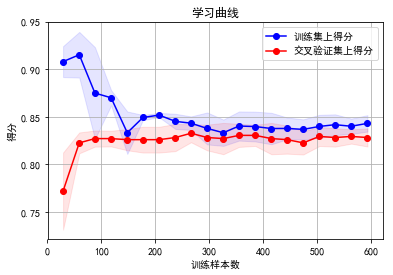

(0.8353156014260352, 0.032906805625476876)

In [424]:
import numpy as np
import matplotlib.pyplot as plt
# from sklearn.learning_curve import learning_curve  修改以fix learning_curve DeprecationWarning
from sklearn.model_selection import learning_curve

# 用sklearn的learning_curve得到training_score和cv_score，使用matplotlib画出learning curve
def plot_learning_curve(estimator, title, X, y, cv, ylim=None, n_jobs=1, 
                        train_sizes=np.linspace(.05, 1., 20), verbose=0, plot=True):
    """
    画出data在某模型上的learning curve.
    参数解释
    ----------
    estimator : 你用的分类器。
    title : 表格的标题。
    X : 输入的feature，numpy类型
    y : 输入的target vector
    ylim : tuple格式的(ymin, ymax), 设定图像中纵坐标的最低点和最高点
    cv : 做cross-validation的时候，数据分成的份数，其中一份作为cv集，其余n-1份作为training(默认为3份)
    n_jobs : 并行的的任务数(默认1)
    """
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, verbose=verbose)
    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    if plot:
        plt.figure()
        plt.title(title)
        if ylim is not None:
            plt.ylim(*ylim)
        plt.xlabel(u"训练样本数")
        plt.ylabel(u"得分")
        plt.gca().invert_yaxis()
        plt.grid()
    
        plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, 
                         alpha=0.1, color="b")
        plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, 
                         alpha=0.1, color="r")
        plt.plot(train_sizes, train_scores_mean, 'o-', color="b", label=u"训练集上得分")
        plt.plot(train_sizes, test_scores_mean, 'o-', color="r", label=u"交叉验证集上得分")
    
        plt.legend(loc="best")
        
        plt.draw()
        plt.gca().invert_yaxis()
        plt.show()
    midpoint = ((train_scores_mean[-1] + train_scores_std[-1]) + (test_scores_mean[-1] - test_scores_std[-1])) / 2
    diff = (train_scores_mean[-1] + train_scores_std[-1]) - (test_scores_mean[-1] - test_scores_std[-1])
    return midpoint, diff

plot_learning_curve(clf, u"学习曲线", X, y, 3)

In [425]:
from sklearn.ensemble import BaggingRegressor

train_df = df.filter(regex='Survived|Age_cut.*|SibSp|Parch|Fare_.*|Cabin_.*|Embarked_.*|Sex_.*|Pclass_.|child*')
train_np = train_df.values

y = train_np[:, 0]
X = train_np[:, 1:]

clf = linear_model.LogisticRegression(C=1.0, penalty='l1', tol=1e-6, solver='liblinear')
bagging_clf = BaggingRegressor(clf, n_estimators=20, max_samples=0.8, max_features=1.0, bootstrap=True, bootstrap_features=False, n_jobs=-1)
bagging_clf.fit(X,y)

test =  df_test.filter(regex='Age_cut.+|SibSp|Parch|Fare_.*|Cabin_.*|Embarked_.*|Sex_.*|Pclass_.*|child')
predictions = bagging_clf.predict(test)
result = pd.DataFrame({'PassengerId':data_test['PassengerId'].values, 'Survived':predictions.astype(np.int32)})
result.to_csv("/kaggle/titanic/my_logistic_regression_bagging_predictions2.csv", index=False)


In [426]:
pd.read_csv('/kaggle/titanic/my_logistic_regression_bagging_predictions2.csv')

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
5,897,0
6,898,0
7,899,1
8,900,0
9,901,0


In [1]:
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelEncoder

import gc

import matplotlib.pyplot as plt

In [4]:
features = pd.read_csv('/kaggle/titanic/Kaggle_Titanic-master/train.csv')
test_features = pd.read_csv('/kaggle/titanic/Kaggle_Titanic-master/test.csv')
features.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
# Extract the ids
train_ids = features['PassengerId']
test_ids = test_features['PassengerId']
    
    # Extract the labels for training
labels = features['Survived']
    
    # Remove the ids and target
features = features.drop(columns = ['PassengerId', 'Survived'])
test_features = test_features.drop(columns = ['PassengerId'])

In [6]:
features = pd.get_dummies(features)
test_features = pd.get_dummies(test_features)
        
        # Align the dataframes by the columns
features, test_features = features.align(test_features, join = 'inner', axis = 1)
        
        # No categorical indices to record
cat_indices = 'auto'

In [7]:
print('Training Data Shape: ', features.shape)
print('Testing Data Shape: ', test_features.shape)
    

Training Data Shape:  (891, 164)
Testing Data Shape:  (418, 164)


In [8]:
# Extract feature names
feature_names = list(features.columns)
    
# Convert to np arrays
features = np.array(features)
test_features = np.array(test_features)
    
# Create the kfold object
k_fold = KFold(n_splits = 5, shuffle = False, random_state = 50)

# Empty array for feature importances
feature_importance_values = np.zeros(len(feature_names))

# Empty array for test predictions
test_predictions = np.zeros(test_features.shape[0])

# Empty array for out of fold validation predictions
out_of_fold = np.zeros(features.shape[0])

# Lists for recording validation and training scores
valid_scores = []
train_scores = []


In [39]:
import lightgbm as lgb
# Iterate through each fold
for train_indices, valid_indices in k_fold.split(features):

    # Training data for the fold
    train_features, train_labels = features[train_indices], labels[train_indices]
    # Validation data for the fold
    valid_features, valid_labels = features[valid_indices], labels[valid_indices]
    
    # Create the model
    model = lgb.LGBMClassifier(n_estimators=10000, objective = 'binary', 
                               class_weight = 'balanced', learning_rate = 0.05, 
                               reg_alpha = 0.1, reg_lambda = 0.1, 
                               subsample = 0.8, n_jobs = -1, random_state = 50)

    # Train the model
    model.fit(train_features, train_labels, eval_metric = 'auc',
              eval_set = [(valid_features, valid_labels), (train_features, train_labels)],
              eval_names = ['valid', 'train'], categorical_feature = cat_indices,
              early_stopping_rounds = 100, verbose = 200)
    # Record the best iteration
    best_iteration = model.best_iteration_
    # Record the feature importances
    feature_importance_values += model.feature_importances_ / k_fold.n_splits

    # Make predictions
    test_predictions = model.predict(test_features, num_iteration = best_iteration)

    # Record the out of fold predictions
    out_of_fold[valid_indices] = model.predict_proba(valid_features, num_iteration = best_iteration)[:, 1]

    # Record the best score
    valid_score = model.best_score_['valid']['auc']
    train_score = model.best_score_['train']['auc']

    valid_scores.append(valid_score)
    train_scores.append(train_score)
    
   
    # Clean up memory
    gc.enable()
    del model, train_features, valid_features
    gc.collect()



Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[69]	train's binary_logloss: 0.296977	train's auc: 0.953767	valid's binary_logloss: 0.496381	valid's auc: 0.823234
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[20]	train's binary_logloss: 0.438408	train's auc: 0.928935	valid's binary_logloss: 0.493468	valid's auc: 0.855709
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[21]	train's binary_logloss: 0.442964	train's auc: 0.920563	valid's binary_logloss: 0.469342	valid's auc: 0.895293
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[35]	train's binary_logloss: 0.366907	train's auc: 0.940703	valid's binary_logloss: 0.441143	valid's auc: 0.863601
Training until validation scores don't improve for 100 rounds.
[200]	train's binary_logloss: 0.19096	train's auc: 0.988186	valid's binary_logloss: 0

In [41]:
test_predictions.shape

(418,)

In [44]:
submission = pd.DataFrame({'PassengerId': test_ids, 'Survived': test_predictions})
submission.to_csv("./submission_lgbm.csv",index = False)